In [13]:
%load_ext autoreload
%autoreload 2

# Funkcje kary - zewnętrzne, wewnętrze i hybrydowe

#### Celem funkcji kary jest zredukowanie problemu ZNP z ograniczeniami do problemu bez ograniczeń i zastosowanie znanych algorytmów optymalizacji. Mając ZNP zdefiniowane w ten sposób:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x)\\
        \large h_{i}(x)=0,\ i = 1, \ldots, n\\
        \large g_{j}(x)\leq 0,\ j = 1, \ldots, n\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{1}
\end{equation}

#### Przy czym $\small f,h_{i},g_{j}:\mathbb{R}^n \rightarrow \mathbb{R},\ n \geq 1$


#### Definiujemy wersję bez ograniczeń:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, F(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{2}
\end{equation}

#### gdzie:

$$\large F(x) = f(x) + B(x)$$
$$\large B(x) = \rho_{1}\sum_{j=1}^{n} \mu(h_j(x)) + \rho_{2}\sum_{i=1}^{m} \psi(g_i(x))$$

#### $\mu$ i $\psi$ to funkcje kary odpowiednio dla ograniczeń zadanych równościami i nierównościami. $\\ \rho_{1},\ \rho_{2}$ to dodatnie współczynniki, który staramy się dobrać tak aby proces poszukiwania rozwiązania był efektywny. Częstą praktyką jest zdefiniowanie jednego współczynnika, który skaluje karę z obu członów.

# Zewnętrzna funkcja kary (Exterior penalty function method)
#### Metody funkcji kary zewnętrznej zmieniają problem z ograniczeniami na pojedyńczy problem bez ograniczeń lub na sekwencję takich problemów. Metoda ta będzie "karać" rozwiązania nie spełniające przyjętych ograniczeń. Istotną rzeczą jest odpowiednie dobranie współczynnika kary (penalty factor)

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x) + \rho B(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{3}
\end{equation}

#### gdzie:
$$\large B(x) = \sum_{j=1}^{n} \lVert h_j(x) \rVert^{q} + \rho_{2}\sum_{i=1}^{m} \lVert \max \{0, g_{j}(x)\} \rVert^{q}$$
$$\rho > 0$$
$$q \geq 0$$
$$f,h_{i},g_{j}\in C^{0}(\mathbb{R}^n)$$



# Intuicja dla ograniczeń zadanych przez nierówność

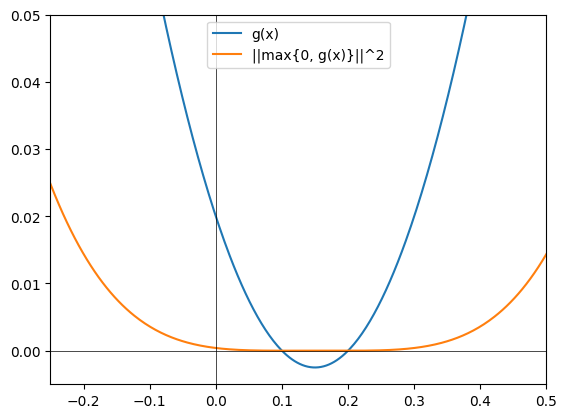

In [2]:
from demos import show_max_penalty_function
show_max_penalty_function()

# Intuicja dla metody 

##### Weźmy prosty przykład dla funkcji jednej zmiennej:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, x^2-10x\\
        \large x-3 \leq 0\\
        \large x\in\mathbb{R}
    \end{cases}
    \tag{4}
\end{equation}


##### Po redukcji do problemu bez ograniczeń:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, (x^2-10x) + \rho ( \max \{0, x-3\} )^{2}\\
        \large x\in\mathbb{R}
    \end{cases}
    \tag{5}
\end{equation}




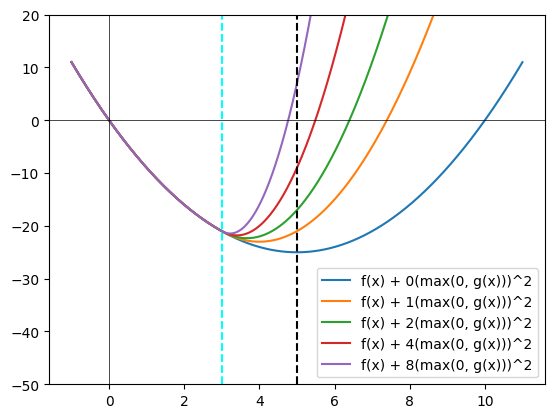

In [3]:
from demos import show_external_penalty_function_method
show_external_penalty_function_method()

# Algorytm dla metody zewnętrznej funkcji kary
#### Po redukcji problemu do wersji bez ograniczeń jesteśmy w stanie zastosować dowolny algorytm optymalizacji dla którego nasza finalna funkcja spełnia jego założenia. Przykładowo może to być metoda siecznych.

## Pseudokod:

#### Niech: $\\ \ \epsilon > 0$ - warunek stopu, $\\ \ x_{1}$ - punkt startowy, $\\ \ \rho_{1}$ - początkowy wspołczynnik przy funkcji kary, $\\ \ c > 1$ - stała skalująca kolejne $\rho_{k}$

#### $k=1$
#### 1. Zaczynając w $x_{k}$ zastosować algorytm optymalizacji do:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x) + \rho_{k} B(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{6}
\end{equation}

#### 2. Niech $x_{k+1}$ to optymalne rozwiązanie otrzymane z algorytmu
#### 3. Jeśli $B(x_{k+1}) < \epsilon$ to kończymy poszukiwanie rozwiązania. W innym wypadku $\rho_{k+1}:=c \rho_{k}$ oraz $k:= k+1$ i wracamy do punktu $1$

# Własności algorytmu (TO DO: Dodać dowody faktów 1,2,3,4)
#### Przy przyjętych założeniach algorytmu zachodzą następujące warunki:

#### 1. $\lim_{k \to \infty} \rho_{k} = \infty$
#### 2. $f(x_{k}) + \rho_{k} B(x_{k}) \leq f(x_{k+1}) + \rho_{k+1} B(x_{k+1})$
#### 3. $B(x_{k}) \geq B(x_{k+1})$
#### 4. $f(x_{k}) \leq f(x_{k+1})$ 

# Przykład działania algorytmu

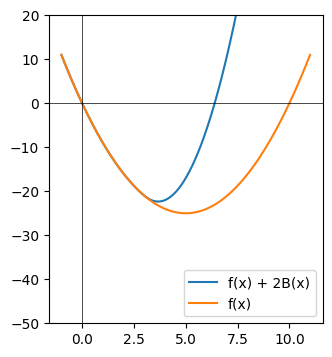

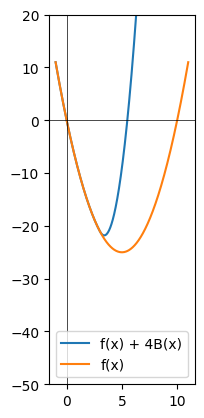

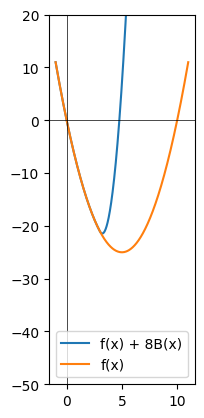

array([3.39999999])

In [32]:
from algorithms import external_penalty_function_method
from matplotlib import pyplot as plt
import numpy as np

EPS = 10e-5
C = 2
RHO_0 = 1
X0 = 9

F = lambda x: x**2 - 10*x

INEQUALITY_CONSTRAINTS = [
    lambda x: x-3 # x-3 <= 0
]

EQUALITY_CONSTRAINTS = []

MAX_ITER = 3
MAX_OPT_ITER = 1000

plt.figure(figsize=(12, 4))

def plot_method_step(f, penalty, rho, optimizer_steps, step):
    x = np.linspace(-1,11,10000)
    
    plt.subplot(1, 3, step)
    plt.plot(x, (f(x) + penalty(x,rho)), label=f'f(x) + {rho}B(x)')
    plt.plot(x, f(x), label='f(x)')
    plt.ylim(-50, 20)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()


external_penalty_function_method(
    EPS,
    C,
    RHO_0,
    X0,
    INEQUALITY_CONSTRAINTS,
    EQUALITY_CONSTRAINTS,
    F,
    MAX_ITER,
    MAX_OPT_ITER,
    callback=plot_method_step,
)

# Wewnętrzna funkcja kary (Barrier methodxdddd
)